<span style ="font-size:35px;"> **Stanford Course CS229 - Lucas Jesus da Rocha** </span> 

<span style ="font-size:30px;"> **Linear Regression with multiple variables** </span> <div>

### Machine Learning Specialization by Andrew Ng 
***

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file **ex1data2.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

Let's check the first 10 examples from the dataset:
x = [2104.    3.], y = 399900.0
x = [1600.    3.], y = 329900.0
x = [2400.    3.], y = 369000.0
x = [1416.    2.], y = 232000.0
x = [3000.    4.], y = 539900.0
x = [1985.    4.], y = 299900.0
x = [1534.    3.], y = 314900.0
x = [1427.    3.], y = 198999.0
x = [1380.    3.], y = 212000.0
x = [1494.    3.], y = 242500.0


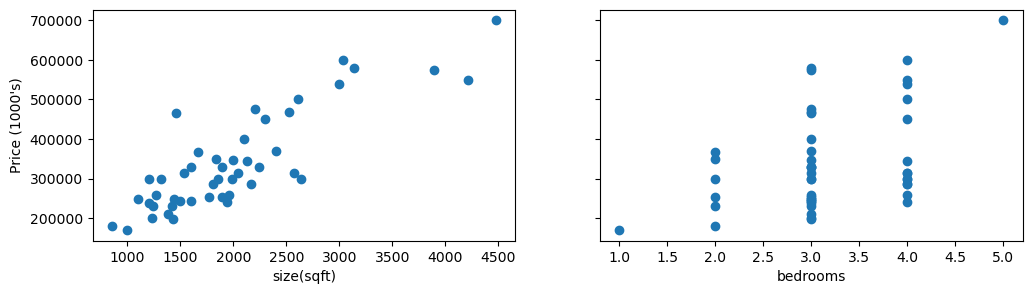

It provides some indication of which features have the strongest influence on price.


In [56]:
plt.ion()

#loading the data
data = np.loadtxt('C:/Users/USER/Downloads/ex1data2.txt', delimiter=',')

X = data[:, 0:2]
X_features = ['size(sqft)','bedrooms']
y = data[:,2]
m = y.size

print(f"Let's check the first 10 examples from the dataset:")
for i in range(10):
    print(f"x = {X[i]}, y = {y[i]}")

#Let's view the dataset and its features by plotting each feature versus price.
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

print(f"It provides some indication of which features have the strongest influence on price.")

### Feature Normalization
***

By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

In [38]:
def feature_normalize(X):
    n = X.shape[1] # the number of features
    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X to account for the intercept term in the model.

**Implementation Note:** When normalizing features, store the mean and standard deviation for later use. To predict prices for unseen houses, normalize the new input values using the previously computed mean and standard deviation from the training set.

### Gradient Descent  
***

Previously, we implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged

In [45]:
def compute_cost(X,y, theta):
    cost = 0
    cost = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y) ** 2)
    return cost

def GradientDescent_multi(X, y, m, alpha, theta, itera):
    J_history = np.zeros(itera) #to store the costs 
    
    for i in range (0, itera):
        hipoteses = np.dot(X,theta)
        error = np.asarray(hipoteses - y) 
        theta -= (alpha) * (1 / m) * np.sum( error[:, np.newaxis] * X, 0) 
        J_history[i] = compute_cost(X,y, theta)
    return theta, J_history

# Choosing some alpha value
alpha = 0.03
num_iters = 400

# Init theta and Run Gradient Descent
theta = np.zeros(3)

theta, J_history = GradientDescent_multi(X, y, m, alpha, theta, num_iters)
print(f"Theta found by Gradient Descent:{theta}")
#print(f"We can see that the algorithm is correctly running (always decreasing the cost): {J_history}")

Theta found by Gradient Descent:[340410.91897274 110308.11337059  -6326.5381075 ]


### Convergence Graph - Learning Curve
***



We can see that the algorithm is correctly running (always decreasing the cost):


Text(0, 0.5, 'Cost J')

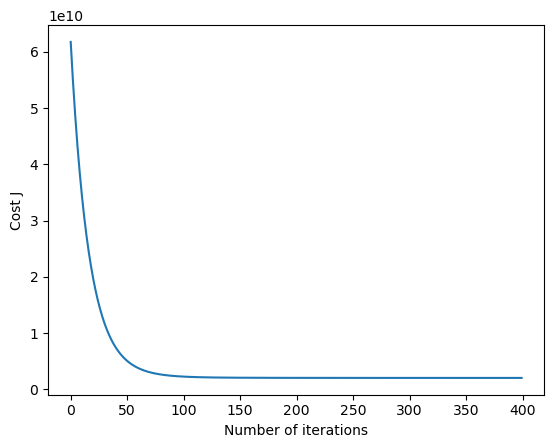

In [49]:
print(f"We can see that the algorithm is correctly running (always decreasing the cost):")
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')


### Estimate the price of a 1650 sq-ft, 3 br house
***



In [52]:
pred = np.array([1650, 3])
pred = (pred - mu) / sigma
pred = np.r_[(1, pred)]
price_pred = np.dot(pred, theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : {:0.3f}'.format(price_pred))


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : 293149.994
